## 无监督学习

### 聚类

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

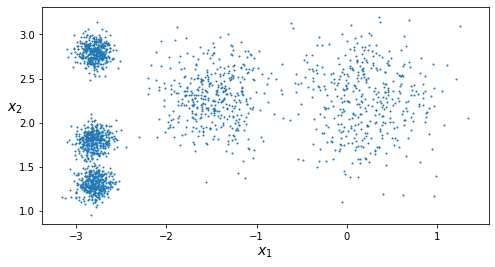

In [6]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [7]:
 from sklearn.cluster import KMeans
 k = 5
 kmeans = KMeans(n_clusters=k)
 y_pred = kmeans.fit_predict(X)
 print(y_pred)

[0 4 1 ... 3 1 4]


In [8]:
print(y_pred is kmeans.labels_)
print(kmeans.cluster_centers_)

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
print(kmeans.predict(X_new))

True
[[-2.80037642  1.30082566]
 [ 0.20667809  2.25769931]
 [-1.46893704  2.28372774]
 [-2.79290307  2.79641063]
 [-2.80389616  1.80117999]]
[1 1 3 3]


In [11]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit_predict(X)
print(kmeans.inertia_)
print(kmeans.score(X))

211.5985372581683
-211.5985372581683


In [12]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.655517642572828


In [14]:
from matplotlib.image import imread
image = imread(os.path.join("images", "ladybug.png"))
print(image.shape)

(533, 800, 3)


In [15]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

0.9666666666666667
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ('log_reg', LogisticRegression()),
])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

0.9488888888888889
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
n_labeled = 50
log_Reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7711111111111111

In [27]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx]

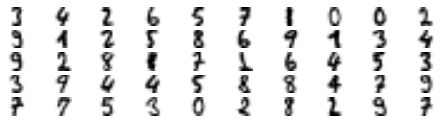

In [28]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [29]:
y_representative_digits = np.array([
    3, 4, 2, 6, 5, 7, 1, 0, 0, 2,
    9, 1, 2, 5, 8, 6, 9, 1, 3, 4,
    9, 2, 8, 8, 7, 1, 6, 4, 5 ,3,
    3, 9, 4, 4, 5, 8, 8, 4, 7, 9,
    7, 7, 5, 3, 0, 2, 8, 2, 9, 7
])

log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
print(log_reg.score(X_test, y_test))

0.9
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
print(log_reg.score(X_test, y_test))

0.9066666666666666
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8977777777777778

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
print(dbscan.labels_)

[0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0
 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0
 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([
    [-0.5, 0],
    [0, 0.5],
    [1, -0.1],
    [2, 1]
])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[0 1 0 1]
[[0.76 0.24]
 [0.   1.  ]
 [0.8  0.2 ]
 [0.   1.  ]]


In [36]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
print(y_pred.ravel())

[-1  1  0 -1]


In [46]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [47]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

print(gm.weights_)
print(gm.means_)
print(gm.covariances_)

[0.40005972 0.39032584 0.20961444]
[[-1.40764129  1.42712848]
 [ 0.05145113  0.07534576]
 [ 3.39947665  1.05931088]]
[[[ 0.63478217  0.72970097]
  [ 0.72970097  1.16094925]]

 [[ 0.68825143  0.79617956]
  [ 0.79617956  1.21242183]]

 [[ 1.14740131 -0.03271106]
  [-0.03271106  0.95498333]]]


In [48]:
print(gm.predict(X))
print(gm.predict_proba(X))

[1 1 0 ... 2 2 2]
[[6.76282339e-07 9.76815996e-01 2.31833274e-02]
 [6.74575575e-04 9.82914418e-01 1.64110061e-02]
 [9.99922764e-01 7.52377580e-05 1.99781831e-06]
 ...
 [2.12540639e-26 4.31902443e-07 9.99999568e-01]
 [1.45002917e-41 5.20915318e-16 1.00000000e+00]
 [7.93266114e-41 2.30971331e-15 1.00000000e+00]]


In [49]:
from matplotlib.colors import LogNorm

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

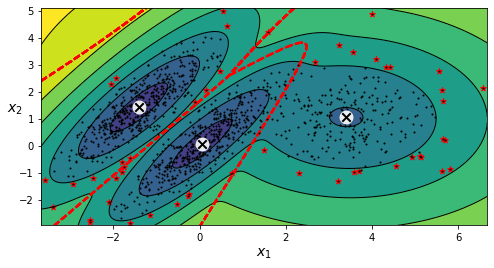

In [50]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()